<a href="https://colab.research.google.com/github/ChenHY1217/Projects-In-MLAI-LABS/blob/main/LAB1/PIMLAI_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
np.random.seed(42)

# load dataset
df = pd.read_csv(path + "/creditcard.csv")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


### Dataset Definition


We will look into the task of Binary Classification. We will be working with a credit card fraud dataset.


Link to Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Dataset Datasheet

Motivation: We intend to utilize this dataset to train and test a model to predict whether a credit card transaction is fraudulent (1) or valid (0). This will be a binary classification task. This is especially important in the banking industry as security for customers are of top priority.

Target Definition: We will predict whether a credit card transaction is fraudulent (1) or valid (0).

Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Note - This is an open database.

Feature Dictionary: Features V1 - V28 are results of PCA due to data involving personal information. They are floats. Next,  we have features "Time" and "Amount" which represents the time passed in seconds since the first transaction and the amount of the transaction.

Limitations/Risks:
* This dataset is heavily imbalanced with few fraud cases compared to valid cases.
* There could be selection bias since only the transactions recognized by the banks are included so it could be missing out on fraud cases.



### Data Quality Audit

--- Missingness Summary ---
No missing values found.

--- Target Distribution (Class) ---
Class
0    284315
1       492
Name: count, dtype: int64


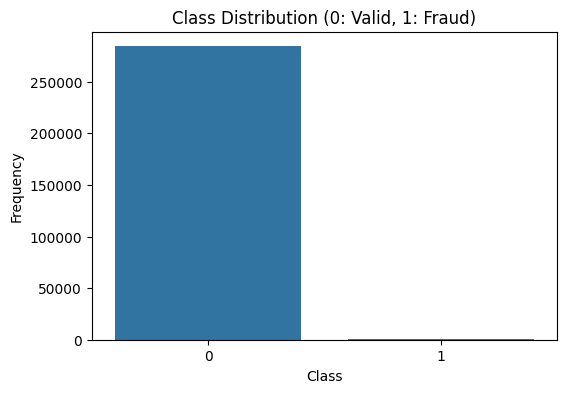


--- Bias / Class Imbalance ---
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

Fraud transactions account for only 0.1727% of the dataset.


In [ ]:
# 1. Missingness Summary
print("--- Missingness Summary ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")

# 2. Target Distribution (Class)
print("\n--- Target Distribution (Class) ---")
class_counts = df['Class'].value_counts()
print(class_counts)

# 3. Visualize Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Valid, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# 4. Bias/Imbalance Analysis
print("\n--- Bias / Class Imbalance ---")
class_percentages = df['Class'].value_counts(normalize=True) * 100
print(class_percentages)
print(f"\nFraud transactions account for only {class_percentages[1]:.4f}% of the dataset.")

In [ ]:
# Check for exact duplicates

exact_duplicates_count = df.duplicated().sum()
print(f"Number of exact duplicate rows: {exact_duplicates_count}")

# Check for near duplicates (Numerical columns withing 4 decimal points)

# First extracting numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Class' in numerical_cols:
    numerical_cols.remove('Class')

# Create a temporary DataFrame with rounded numerical columns
df_rounded = df[numerical_cols].round(4)

# Check for duplicates in the rounded DataFrame
near_duplicates_count = df_rounded.duplicated().sum()

print(f"\nNumber of near duplicate rows (after rounding numerical columns to 4 decimal places): {near_duplicates_count}")

Number of exact duplicate rows: 1081

Number of near duplicate rows (after rounding numerical columns to 4 decimal places): 1081


### Ethics & Bias Note

*   **Class Imbalance Bias:** The dataset is extremely imbalanced (0.17% fraud). Standard models may bias heavily towards the majority class (predicting everything as "Valid") to achieve high accuracy, effectively ignoring the minority class. This requires mitigation strategies like resampling or cost-sensitive learning to ensure the model actually serves its purpose without ignoring rare fraud events.
*   **Privacy vs. Interpretability:** The features `V1-V28` are PCA-transformed to protect user privacy (an ethical necessity for sensitive financial data). However, this opacity prevents us from auditing the model for fairness regarding specific attributes (e.g., verifying that the model doesn't bias against specific locations or spending habits that might correlate with protected groups).
*   **Impact of False Positives:** In fraud detection, a "False Positive" (flagging a valid transaction as fraud) causes customer inconvenience (card declines). If the model is biased or overly aggressive, it could disproportionately affect legitimate users with unique spending patterns.

### Leakage Notes

Based on our data-quality audit, our chosen dataset consists of 1081 duplicates. To prevent this leakage, we will remove duplicate rows, to prevent overfitting of our dataset, and skewed data distribution. Another source of leakage comes from the Time attribute. We will drop this column, since it's possible that many instances of fraud occurred at or around the same time. By dropping this column, we will ensure that the data modeling will focus on the principal components features, rather than the unreliable time attribute.

In [ ]:
# Drop the 'Time' column as per Leakage Notes
df.drop('Time', axis=1, inplace=True)

df.drop_duplicates(inplace=True)


# Check duplicates were removed
exact_duplicates_count = df.duplicated().sum()
print(f"Number of exact duplicate rows: {exact_duplicates_count}")

# Re-extract numerical columns after dropping 'Time'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Class' in numerical_cols:
    numerical_cols.remove('Class')

# Check all near duplicates were removed
df_rounded = df[numerical_cols].round(4)
near_duplicates_count = df_rounded.duplicated().sum()

print(f"\nNumber of near duplicate rows (after rounding numerical columns to 4 decimal places): {near_duplicates_count}")

Number of exact duplicate rows: 0

Number of near duplicate rows (after rounding numerical columns to 4 decimal places): 0


### Split Strategy

We will use a random train/test split, with 80% as training data and 20% as test data. This is because we do not have time ordering after ensuring leakage-safety.

In [ ]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Perform 80/20 train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of 'Class' in original DataFrame:")
print(y.value_counts(normalize=True))

print("\nDistribution of 'Class' in y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of 'Class' in y_test:")
print(y_test.value_counts(normalize=True))

NameError: name 'df' is not defined

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Identify columns to scale
# 'Amount' requires scaling. 'V1'-'V28' are PCA components, so we keep them as is.
features_to_scale = ['Amount']

# 2. Create the ColumnTransformer
# This applies StandardScaler to 'Amount' and passes other columns through.
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features_to_scale)
    ],
    remainder='passthrough'  # Keep V1-V28 as they are
)

# 3. Create the Pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 4. Fit the pipeline on Training data ONLY
preprocessing_pipeline.fit(X_train)

# 5. Transform Training and Test data
X_train_scaled = preprocessing_pipeline.transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

# 6. Reconstruct DataFrames (preserves column names and indices)
# Note: ColumnTransformer places transformed columns (Amount) first.
processed_columns = features_to_scale + [col for col in X_train.columns if col not in features_to_scale]

X_train_processed = pd.DataFrame(X_train_scaled, columns=processed_columns, index=X_train.index)
X_test_processed = pd.DataFrame(X_test_scaled, columns=processed_columns, index=X_test.index)

print("Preprocessing complete.")
display(X_train_processed.head())

Preprocessing complete.


,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
85263,-0.256366,-0.204719,0.230561,0.585213,-1.042216,0.523612,-0.813961,0.521473,-0.349696,-1.985971,...,1.763844,0.428518,0.295196,0.769031,-0.295086,-0.358231,0.191942,-0.015486,0.104205,0.127050
87877,-0.340462,-1.536222,1.076634,1.158729,-1.014278,0.303728,-1.434520,0.880383,0.199717,-0.694732,...,-1.587533,-0.427334,0.020621,-0.183758,-0.104223,0.380524,0.767783,0.125901,-0.293290,-0.056513
199987,-0.270862,0.180614,1.100063,-1.022411,0.003125,0.208371,-1.445858,0.602641,0.118823,-0.112330,...,-0.255332,-0.240878,0.331292,0.920748,-0.059538,-0.033873,-0.277221,-0.151729,-0.074708,-0.046507
92683,-0.346073,-0.090912,0.770375,1.106896,0.000738,0.843993,0.130005,0.816123,-0.311543,-0.209850,...,1.355919,0.131621,-0.287096,-0.616660,-0.176805,-0.910379,-0.722550,0.077614,-0.335306,-0.300600
198830,-0.338786,-0.256459,1.085422,-0.698082,-1.339884,1.567292,-0.964274,1.967021,-1.024060,0.361965,...,0.131164,0.213442,0.092316,0.760264,-0.335504,0.795715,0.181275,-0.002008,-0.748489,-0.564823


### kNN Model Training

We will train a simple baseline model for our dataset using kNN. We will use k=3.

Training kNN model
Predicting on Test set

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55038
           1       0.88      0.75      0.81        95

    accuracy                           1.00     55133
   macro avg       0.94      0.87      0.90     55133
weighted avg       1.00      1.00      1.00     55133



<Figure size 600x500 with 0 Axes>

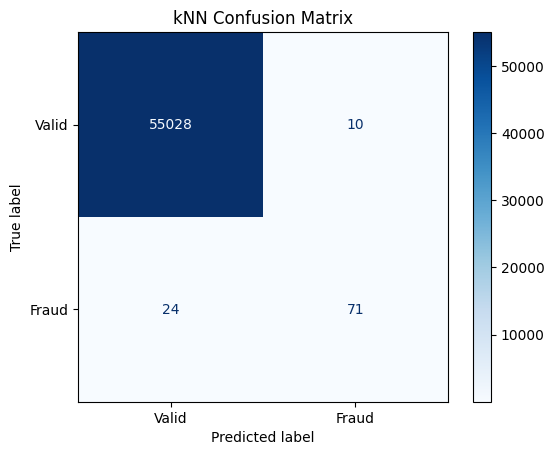

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize kNN model
# We use n_jobs=-1 to parallelize the computation as kNN can be slow on large datasets
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

print("Training kNN model")
knn.fit(X_train_processed, y_train)

print("Predicting on Test set")
y_pred = knn.predict(X_test_processed)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Valid', 'Fraud'])
disp.plot(cmap='Blues', values_format='d')
plt.title("kNN Confusion Matrix")
plt.grid(False)
plt.show()

### Model Evaluation Summary

For our dataset, the kNN model had perfect Precision and Recall for Class 0 (Valid transactions). Meanwhile, Class 1 (Fraud transactions) had Precision of 0.88 and Recall of 0.75. This is expected given the class imbalance in our dataset.

The Confusion Matrix indicate the model had:
*   55,028 True Negatives
*   10 False Positives
*   24 False Negatives
*   71 True Positives

Overall, the baseline kNN model (k=3) has a high accuracy overall due to the majority class, but missing 25% of fraud cases (Recall 0.75) suggests there is room for improvement.